Stratégie loterie

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [215]:
game = np.ones(12)
game = np.array(game)/np.sum(game)

In [216]:
nbr_joueur = 100

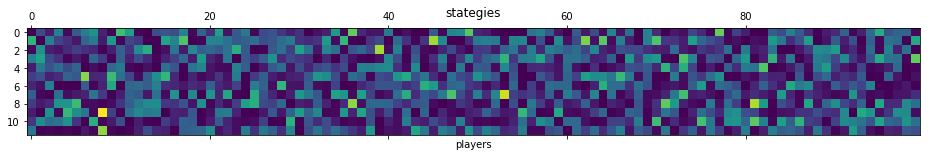

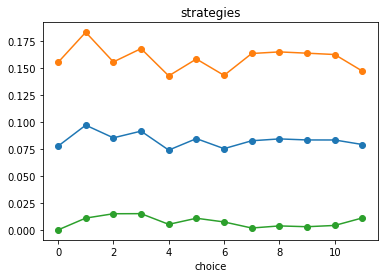

In [217]:
#  Initialisation

# Uniform distribution
# i.e. players play at random
joueurs = np.ones((nbr_joueur, game.size))/game.size

# Random gamers
joueurs = np.random.rand(nbr_joueur, game.size)**2
joueurs = joueurs / np.sum(joueurs, axis=1)[:, np.newaxis]

# only play the most propable distribution
# i.e. players play at random
#joueurs = np.ones((nbr_joueur, game.size))
#joueurs[:, :-1] = 0.1
#joueurs = joueurs / np.sum(joueurs, axis=1)[:, np.newaxis]
# not stable... !

# Score matrix
cumulated_gain = np.zeros_like(joueurs)

# graphs
plt.matshow(joueurs.T);
plt.xlabel('players'); plt.title('stategies'); 

plt.figure();
plt.plot(joueurs.mean(axis=0), '-o', label='average');
plt.plot(joueurs.mean(axis=0)+joueurs.std(axis=0), '-o', label='std');
plt.plot(joueurs.mean(axis=0)-joueurs.std(axis=0), '-o', label='std');
plt.xlabel('choice'); plt.title('strategies'); 

In [262]:
for _ in range(200):
    # one round

    # Players make their choice
    all_choices = []
    for joueur in joueurs:
        choice = np.random.choice(game.size, size=1, p=joueur)[0]
        all_choices.append(choice)

    all_choices = np.array(all_choices)

    # the game
    win_draw = np.random.choice(game.size, size=1, p=game)[0]
    winners = (all_choices == win_draw)
    #print(sum(winners))

    gain = nbr_joueur/sum(winners) - 1
    #print(gain)

    # update gains
    cumulated_gain[winners, all_choices[winners]] += gain
    cumulated_gain[np.logical_not(winners), all_choices[np.logical_not(winners)]] += -1

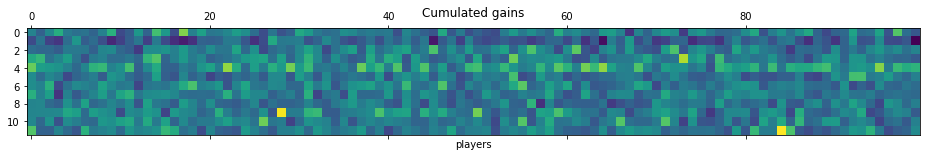

In [263]:
plt.matshow(cumulated_gain.T);
plt.xlabel('players'); plt.title('Cumulated gains'); 

In [264]:
# verification should == 0
print(cumulated_gain.sum())

5.9117155615240335e-12


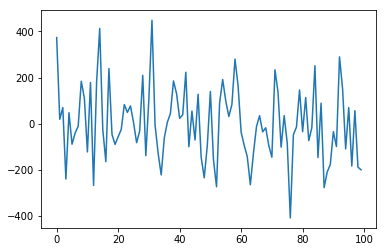

In [265]:
plt.plot(cumulated_gain.sum(axis=1));

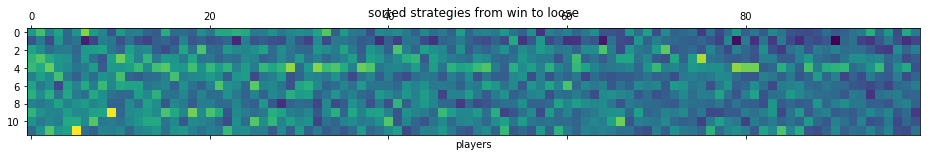

In [266]:
sorted_players = np.argsort(cumulated_gain.sum(axis=1))[::-1]
plt.matshow(cumulated_gain[sorted_players].T);
plt.title('sorted strategies from win to loose');
plt.xlabel('players');

<Figure size 432x288 with 0 Axes>

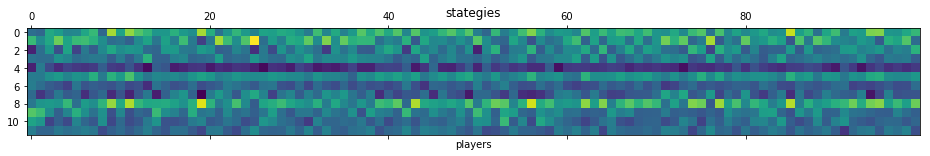

<Figure size 432x288 with 0 Axes>

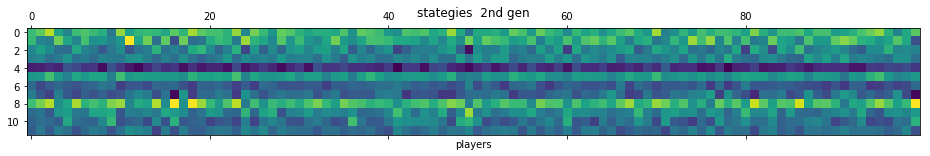

In [267]:
# Evolution
gain_per_players = cumulated_gain.sum(axis=1)

normed_gain = (gain_per_players - gain_per_players.min())/gain_per_players.ptp()
normed_gain = normed_gain**2

proba_reproduce = normed_gain/np.sum(normed_gain)

couples = np.random.choice(nbr_joueur, size=(nbr_joueur, 2),
                           replace=True, p=proba_reproduce)

joueurs_2ndGen = (joueurs[couples[:, 0]] + joueurs[couples[:, 1]])/2

# graphs
plt.figure();
plt.matshow(joueurs.T);
plt.xlabel('players'); plt.title('stategies'); 

plt.figure();
plt.matshow(joueurs_2ndGen.T);
plt.xlabel('players'); plt.title('stategies  2nd gen'); 

joueurs = joueurs_2ndGen

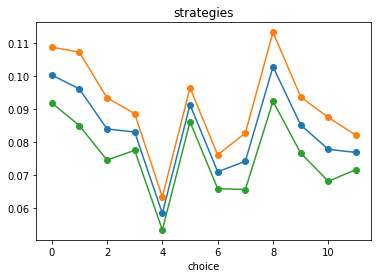

In [268]:
plt.figure();
plt.plot(joueurs.mean(axis=0), '-o', label='average');
plt.plot(joueurs.mean(axis=0)+joueurs.std(axis=0), '-o', label='std');
plt.plot(joueurs.mean(axis=0)-joueurs.std(axis=0), '-o', label='std');
plt.xlabel('choice'); plt.title('strategies'); 

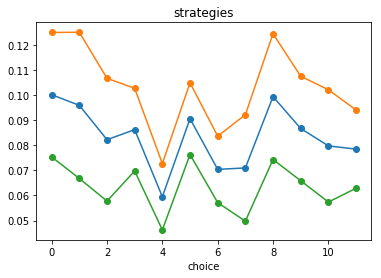

In [247]:
plt.figure();
plt.plot(joueurs.mean(axis=0), '-o', label='average');
plt.plot(joueurs.mean(axis=0)+joueurs.std(axis=0), '-o', label='std');
plt.plot(joueurs.mean(axis=0)-joueurs.std(axis=0), '-o', label='std');
plt.xlabel('choice'); plt.title('strategies'); 

système à somme nulle --> le nombre de gagnant n'augmente pas  
si tt le monde joue pareille, personne ne gagne  
  

--> avec des populations évoluant séparement ?  non égale, petite population et la masse

--> avec un jeu uniforme (loto)  
... instabilité... une culture apparait (i.e. une superstition)  
... il est possible de l'exploiter  

apparition de la segregation, reproduction entre soi
en opposition de la stratégie des autres  
augmente les gains du groupes  

  
ajouter une localité dans la reproduction... ou une classe/caste artificiellement


note: variabilité, et gêne aléatoire au lieu de la moyenne... ?